In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [5]:
from tensorflow.keras.preprocessing.image import load_img

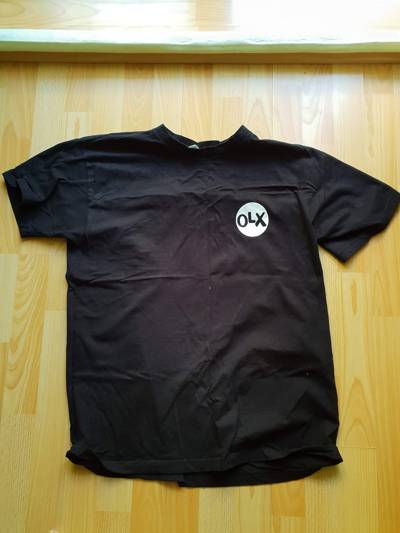

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

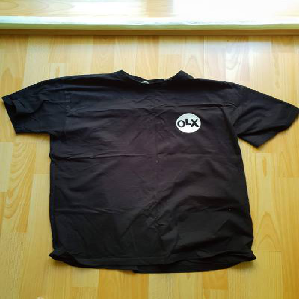

In [7]:
load_img(fullname, target_size=(299, 299))

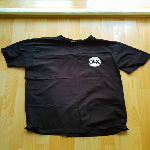

In [8]:
load_img(fullname, target_size=(150, 150))

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

In [10]:
model = MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [11]:
img = load_img(fullname, target_size=(224, 224))
x = np.array(img)
x.shape

(224, 224, 3)

In [12]:
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

In [15]:
pred.shape

(1, 1000)

In [16]:
pred[0, :10]

array([4.0994113e-04, 2.6446862e-05, 3.9724160e-05, 2.5048648e-05,
       1.5226716e-05, 1.0567430e-04, 2.7054542e-05, 2.0510432e-05,
       1.2883768e-04, 1.1595695e-04], dtype=float32)

In [17]:
decode_predictions(pred)

[[('n02916936', 'bulletproof_vest', 0.5632503),
  ('n04370456', 'sweatshirt', 0.123505324),
  ('n03595614', 'jersey', 0.11774085),
  ('n04235860', 'sleeping_bag', 0.08214962),
  ('n02769748', 'backpack', 0.021227993)]]

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_size = (150, 150)
batch_size = 32

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [21]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

In [23]:
base_model.trainable = False

In [24]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

In [25]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 16s 141ms/step - loss: 1.9492 - accuracy: 0.6008 - val_loss: 1.3005 - val_accuracy: 0.7302
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6806 - accuracy: 0.8195 - val_loss: 1.0662 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3533 - accuracy: 0.8981 - val_loss: 0.8620 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2487 - accuracy: 0.9273 - val_loss: 1.1668 - val_accuracy: 0.7742
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.1554 - accuracy: 0.9501 - val_loss: 0.8910 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 12s 128ms/step - loss: 0.1026 - accuracy: 0.9633 - val_loss: 1.0511 - val_accuracy: 0.7859
Epoch 7/10
96/96 [==============================] - 12s 126ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 1.2190 - val_accuracy: 0.7771

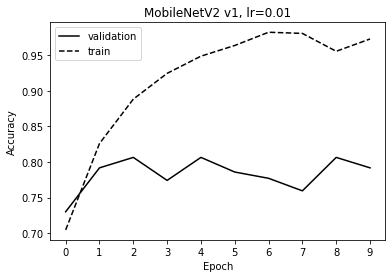

In [27]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('MobileNetV2 v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('mobilenetv2_v1_0_01.svg')

plt.show()

In [28]:
def make_model(learning_rate):
    base_model = MobileNetV2(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [29]:
model = make_model(learning_rate=0.001)
history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 15s 136ms/step - loss: 1.7693 - accuracy: 0.4615 - val_loss: 0.6931 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5716 - accuracy: 0.8029 - val_loss: 0.5925 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.4165 - accuracy: 0.8547 - val_loss: 0.5482 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3480 - accuracy: 0.8836 - val_loss: 0.5323 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2868 - accuracy: 0.9156 - val_loss: 0.5696 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2549 - accuracy: 0.9254 - val_loss: 0.5305 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 12s 125ms/step - loss: 0.1991 - accuracy: 0.9549 - val_loss: 0.5229 - val_accuracy: 0.8123

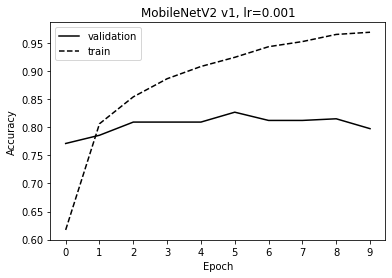

In [30]:
plt.figure(figsize=(6, 4))

epochs = history_0_001.epoch
val = history_0_001.history['val_accuracy']
train = history_0_001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('MobileNetV2 v1, lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('mobilenetv2_v1_0_001.svg')

plt.show()

In [31]:
model = make_model(learning_rate=0.0001)
history_0_0001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 2.5070 - accuracy: 0.2309 - val_loss: 1.8460 - val_accuracy: 0.4047
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 1.6705 - accuracy: 0.4694 - val_loss: 1.4039 - val_accuracy: 0.5220
Epoch 3/10
96/96 [==============================] - 12s 128ms/step - loss: 1.2551 - accuracy: 0.5943 - val_loss: 1.1642 - val_accuracy: 0.6070
Epoch 4/10
96/96 [==============================] - 12s 129ms/step - loss: 1.0305 - accuracy: 0.6665 - val_loss: 1.0145 - val_accuracy: 0.6686
Epoch 5/10
96/96 [==============================] - 13s 130ms/step - loss: 0.9075 - accuracy: 0.7074 - val_loss: 0.9171 - val_accuracy: 0.6921
Epoch 6/10
96/96 [==============================] - 13s 131ms/step - loss: 0.8339 - accuracy: 0.7299 - val_loss: 0.8430 - val_accuracy: 0.7214
Epoch 7/10
96/96 [==============================] - 12s 130ms/step - loss: 0.7410 - accuracy: 0.7658 - val_loss: 0.7879 - val_accuracy: 0.7449

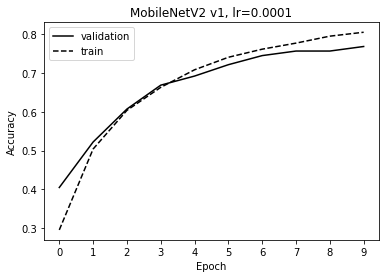

In [32]:
plt.figure(figsize=(6, 4))

epochs = history_0_0001.epoch
val = history_0_0001.history['val_accuracy']
train = history_0_0001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('MobileNetV2 v1, lr=0.0001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('mobilenetv2_v1_0_0001.svg')

plt.show()

In [33]:
epochs = np.arange(10)
val_0_01 = history.history['val_accuracy']
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']

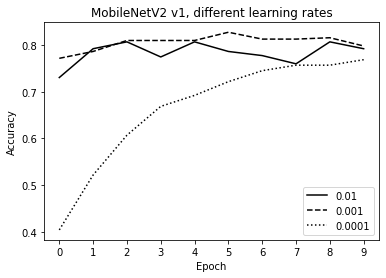

In [34]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_01, color='black', linestyle='solid', label='0.01')
plt.plot(epochs, val_0_001, color='black', linestyle='dashed', label='0.001')
plt.plot(epochs, val_0_0001, color='black', linestyle='dotted', label='0.0001')


plt.title('MobileNetV2 v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

plt.savefig('mobilenetv2_v1_all_lr.svg')

plt.show()


In [ ]:
model = make_model(learning_rate=0.001)

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.8486 - accuracy: 0.4157 - val_loss: 0.6889 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5728 - accuracy: 0.8109 - val_loss: 0.5553 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.4058 - accuracy: 0.8747 - val_loss: 0.5473 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3497 - accuracy: 0.8948 - val_loss: 0.5183 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2914 - accuracy: 0.9098 - val_loss: 0.5272 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 12s 126ms/step - loss: 0.2437 - accuracy: 0.9289 - val_loss: 0.5137 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2065 - accuracy: 0.9468 - val_loss: 0.5010 - val_accuracy: 0.8152

In [37]:
def make_model(learning_rate, droprate):
    base_model = MobileNetV2(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

In [39]:
history_0 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 15s 134ms/step - loss: 1.3885 - accuracy: 0.5725 - val_loss: 0.5973 - val_accuracy: 0.7947
Epoch 2/30
96/96 [==============================] - 12s 125ms/step - loss: 0.4419 - accuracy: 0.8514 - val_loss: 0.5688 - val_accuracy: 0.8182
Epoch 3/30
96/96 [==============================] - 12s 127ms/step - loss: 0.2717 - accuracy: 0.9049 - val_loss: 0.5425 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 12s 126ms/step - loss: 0.2012 - accuracy: 0.9380 - val_loss: 0.5803 - val_accuracy: 0.7977
Epoch 5/30
96/96 [==============================] - 12s 128ms/step - loss: 0.1151 - accuracy: 0.9738 - val_loss: 0.6167 - val_accuracy: 0.7859
Epoch 6/30
96/96 [==============================] - 12s 127ms/step - loss: 0.0875 - accuracy: 0.9850 - val_loss: 0.6375 - val_accuracy: 0.7947
Epoch 7/30
96/96 [==============================] - 12s 127ms/step - loss: 0.0556 - accuracy: 0.9921 - val_loss: 0.6028 - val_accuracy: 0.8152

In [40]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v2_0_2_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_1 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 15s 134ms/step - loss: 1.4101 - accuracy: 0.5514 - val_loss: 0.6131 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 13s 131ms/step - loss: 0.5782 - accuracy: 0.7963 - val_loss: 0.5321 - val_accuracy: 0.8270
Epoch 3/30
96/96 [==============================] - 13s 130ms/step - loss: 0.3848 - accuracy: 0.8717 - val_loss: 0.5177 - val_accuracy: 0.8035
Epoch 4/30
96/96 [==============================] - 13s 133ms/step - loss: 0.3109 - accuracy: 0.8956 - val_loss: 0.5269 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 13s 134ms/step - loss: 0.2521 - accuracy: 0.9189 - val_loss: 0.4944 - val_accuracy: 0.8240
Epoch 6/30
96/96 [==============================] - 12s 127ms/step - loss: 0.1731 - accuracy: 0.9493 - val_loss: 0.5282 - val_accuracy: 0.8240
Epoch 7/30
96/96 [==============================] - 12s 127ms/step - loss: 0.1495 - accuracy: 0.9557 - val_loss: 0.5868 - val_accuracy: 0.8094

In [41]:
model = make_model(learning_rate=0.001, droprate=0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v2_0_5_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_2 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 16s 141ms/step - loss: 1.8399 - accuracy: 0.4318 - val_loss: 0.7125 - val_accuracy: 0.7625
Epoch 2/30
96/96 [==============================] - 12s 128ms/step - loss: 0.8394 - accuracy: 0.7224 - val_loss: 0.5670 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 12s 127ms/step - loss: 0.6413 - accuracy: 0.7799 - val_loss: 0.5526 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 12s 128ms/step - loss: 0.5410 - accuracy: 0.8093 - val_loss: 0.5470 - val_accuracy: 0.7977
Epoch 5/30
96/96 [==============================] - 12s 128ms/step - loss: 0.4928 - accuracy: 0.8408 - val_loss: 0.5271 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 12s 127ms/step - loss: 0.4129 - accuracy: 0.8595 - val_loss: 0.4960 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 12s 127ms/step - loss: 0.3517 - accuracy: 0.8847 - val_loss: 0.4850 - val_accuracy: 0.8446

In [42]:
model = make_model(learning_rate=0.001, droprate=0.8)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v2_0_8_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_3 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 15s 135ms/step - loss: 2.4833 - accuracy: 0.2325 - val_loss: 1.3101 - val_accuracy: 0.5367
Epoch 2/30
96/96 [==============================] - 12s 128ms/step - loss: 1.6334 - accuracy: 0.4382 - val_loss: 1.0851 - val_accuracy: 0.6246
Epoch 3/30
96/96 [==============================] - 12s 128ms/step - loss: 1.4038 - accuracy: 0.5138 - val_loss: 0.9578 - val_accuracy: 0.6716
Epoch 4/30
96/96 [==============================] - 12s 128ms/step - loss: 1.3300 - accuracy: 0.5357 - val_loss: 0.8700 - val_accuracy: 0.7067
Epoch 5/30
96/96 [==============================] - 12s 129ms/step - loss: 1.2692 - accuracy: 0.5244 - val_loss: 0.7933 - val_accuracy: 0.7419
Epoch 6/30
96/96 [==============================] - 12s 128ms/step - loss: 1.1771 - accuracy: 0.5780 - val_loss: 0.7469 - val_accuracy: 0.7771
Epoch 7/30
96/96 [==============================] - 12s 127ms/step - loss: 1.1404 - accuracy: 0.5738 - val_loss: 0.6929 - val_accuracy: 0.8035

In [43]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']
train08 = history_3.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']
val08 = history_3.history['val_accuracy']

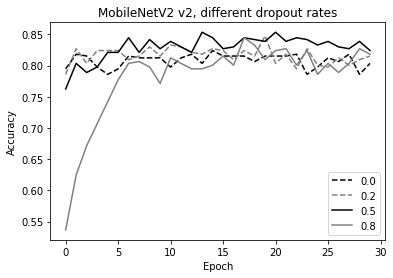

In [44]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, val08, color='grey', linestyle='solid', label='0.8')


plt.title('MobileNetV2 v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('mobilenetv2_v2_dropout.svg')

plt.show()

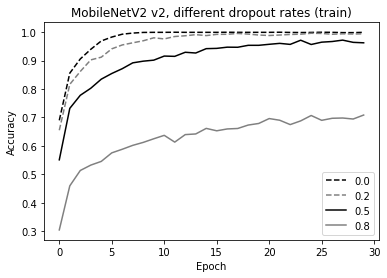

In [45]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, train08, color='grey', linestyle='solid', label='0.8')


plt.title('MobileNetV2 v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('mobilenetv2_v2_dropout_train.svg')

plt.show()

In [46]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [47]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "mobilenetv2_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

Epoch 1/50
96/96 [==============================] - 27s 258ms/step - loss: 1.6134 - accuracy: 0.5073 - val_loss: 0.6463 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 24s 251ms/step - loss: 0.6587 - accuracy: 0.7831 - val_loss: 0.5661 - val_accuracy: 0.7977
Epoch 3/50
96/96 [==============================] - 24s 251ms/step - loss: 0.5381 - accuracy: 0.8216 - val_loss: 0.5418 - val_accuracy: 0.8123
Epoch 4/50
96/96 [==============================] - 24s 252ms/step - loss: 0.4539 - accuracy: 0.8473 - val_loss: 0.5312 - val_accuracy: 0.8065
Epoch 5/50
96/96 [==============================] - 24s 250ms/step - loss: 0.3971 - accuracy: 0.8710 - val_loss: 0.5929 - val_accuracy: 0.8006
Epoch 6/50
96/96 [==============================] - 24s 252ms/step - loss: 0.3707 - accuracy: 0.8730 - val_loss: 0.5319 - val_accuracy: 0.8035
Epoch 7/50
96/96 [==============================] - 24s 250ms/step - loss: 0.3141 - accuracy: 0.8956 - val_loss: 0.5395 - val_accuracy: 0.8270

In [48]:
epochs = history.epoch
accuracy = history.history['val_accuracy']

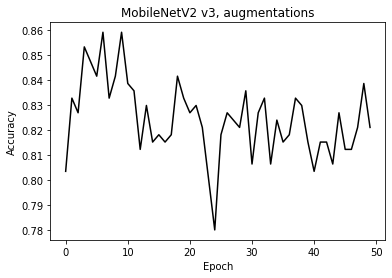

In [49]:
plt.plot(epochs, accuracy, color='black', linestyle='solid')


plt.title('MobileNetV2 v3, augmentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.savefig('mobilenetv2_v3_aug.svg')

plt.show()

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [51]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [53]:
image_size = (150, 150)

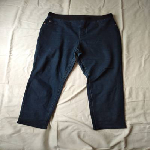

In [54]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [55]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [56]:
pred = model.predict(X)
pred[0]

array([-7.525638  , -8.140915  ,  0.11326192, -4.3424644 , 12.27749   ,
       -4.9355617 , -9.034412  ,  4.6640687 , -3.5122693 , -5.9227443 ],
      dtype=float32)

In [57]:
pred[0].argmax()

4

In [58]:
labels[pred[0].argmax()]

'pants'

In [59]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [60]:
model.evaluate(test_ds)

12/12 [==============================] - 7s 560ms/step - loss: 0.8651 - accuracy: 0.8011


[0.8651471138000488, 0.801075279712677]

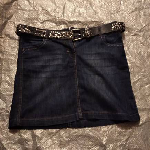

In [61]:
path = '/content/clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg'
img = load_img(path, target_size=(image_size))
img

In [62]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [63]:
pred = model.predict(X)
pred[0]

array([-2.845288 , -4.9377136, -4.6322613, -8.792784 , -2.1090162,
       -6.268841 , -6.9720054,  3.3316104,  9.005622 ,  3.3240569],
      dtype=float32)

In [64]:
pred[0].argmax()

8

In [65]:
labels[pred[0].argmax()]

'skirt'

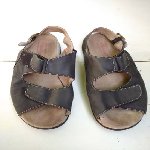

In [66]:
path = '/content/clothing-dataset-small/test/shoes/2174d585-e8cf-43ce-bb61-de1567c74fd5.jpg'
img = load_img(path, target_size=(image_size))
img

In [67]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [68]:
pred = model.predict(X)
pred[0]

array([-23.22626   ,   2.2766337 ,  -5.9605875 ,   0.93844503,
        -1.749724  , -16.753735  ,  33.783875  ,  -0.38304183,
       -11.035209  , -16.247627  ], dtype=float32)

In [69]:
pred[0].argmax()

6

In [70]:
labels[pred[0].argmax()]

'shoes'

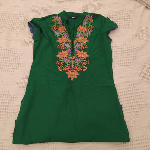

In [71]:
path = '/content/clothing-dataset-small/test/dress/bac70656-a50a-4a13-8c3f-63e3a0a28338.jpg'
img = load_img(path, target_size=(image_size))
img

In [72]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [73]:
pred = model.predict(X)
pred[0]

array([ 11.849646 , -12.31014  ,  -4.2847443,  -2.7619672, -11.205604 ,
        -7.847275 ,  -5.3897157,  -6.646086 ,  -3.5180528,  11.616349 ],
      dtype=float32)

In [74]:
pred[0].argmax()
labels[pred[0].argmax()]

'dress'

In [75]:
pred[0].argmax()

0

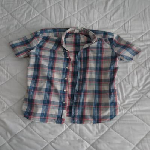

In [76]:
path = '/content/clothing-dataset-small/test/shirt/5089843a-ecf8-4cb6-8f35-587f19125046.jpg'
img = load_img(path, target_size=(image_size))
img

In [77]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

pred = model.predict(X)
pred[0]

array([ -6.4552817, -13.174615 ,   0.7406551,  -2.0515158,  -9.673132 ,
        11.792482 , -10.819112 ,  -5.9608073,  -4.137852 ,   5.345366 ],
      dtype=float32)

In [78]:
pred[0].argmax()

5

In [79]:
labels[pred[0].argmax()]

'shirt'

In [80]:
#Import your test images to colab. I use pinterest to store the the images. 
%mkdir /content/test/
%cd /content/test/

!curl -L "https://images.unsplash.com/photo-1572804013309-59a88b7e92f1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=684&q=80.jpg" > test.jpeg;

/content/test
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 89258  100 89258    0     0   162k      0 --:--:-- --:--:-- --:--:--  162k


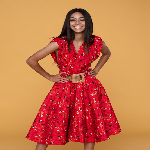

In [81]:
path = '/content/test/test.jpeg'
img = load_img(path, target_size=(image_size))
img

In [82]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

pred = model.predict(X)
pred[0]

array([ 16.460165  , -11.608447  ,   5.8145022 ,   5.9311953 ,
         0.59148216,  -1.0020359 , -19.153288  , -11.69268   ,
         5.5608573 ,  -7.0850725 ], dtype=float32)

In [83]:
pred[0].argmax()

0

In [84]:
labels[pred[0].argmax()]

'dress'

In [92]:
#Import your test images to colab. I use pinterest to store the the images. 
%mkdir /content/test/
%cd /content/test/

!curl -L "https://st4.depositphotos.com/13193658/27067/i/1600/depositphotos_270674086-stock-photo-beautiful-smiling-teenage-girl-looking.jpg" > test.jpeg;

mkdir: cannot create directory ‘/content/test/’: File exists
/content/test
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112k  100  112k    0     0   291k      0 --:--:-- --:--:-- --:--:--  290k


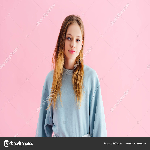

In [93]:
path = '/content/test/test.jpeg'
img = load_img(path, target_size=(image_size))
img

In [97]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

pred = model.predict(X)
pred[0]

array([  3.3363976,  -6.755896 ,   1.3598601,   9.9401   ,   3.18007  ,
        -3.4363723, -10.090743 ,  -4.4552064,   1.9122082, -11.578595 ],
      dtype=float32)

In [98]:
pred[0].argmax()

3

In [99]:
labels[pred[0].argmax()]

'outwear'

In [1]:
#Import your test images to colab. I use pinterest to store the the images. 
%mkdir /content/test/
%cd /content/test/

!curl -L "https://m.media-amazon.com/images/G/01/Shopbop/p/prod/products/cameo/cameo305691071c/cameo305691071c_q6_2-0._UX357_QL90_.jpg" > test.jpeg;

/content/test
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20753  100 20753    0     0   232k      0 --:--:-- --:--:-- --:--:--  232k


In [87]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 112kB 10.9MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [88]:
model.save("model.h5")

In [90]:
!tensorflowjs_converter --input_format=keras /content/test/model.h5 /tmp/tfjs_model

2021-04-22 12:13:30.364725: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [91]:
!tensorflowjs_converter --input_format tfjs_layers_model --output_format tfjs_graph_model /tmp/tfjs_model/model.json graph_model

2021-04-22 12:13:42.966270: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-22 12:13:45.103000: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-22 12:13:45.107088: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-22 12:13:45.118313: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-22 12:13:45.118380: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e0582d32cdbe): /proc/driver/nvidia/version does not exist
2021-04-22 12:13:45.118713: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfo